<a href="https://colab.research.google.com/github/nishant123456767/AirBnb-EDA-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Importing libraries

In [ ]:
# importing all libraries required in the dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the dataset

In [ ]:
#load csv file 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 1/Team capstone project/Copy of Airbnb NYC 2019.csv')

# understanding our dataset

In [ ]:
#check data frame shape 
data.shape

(48895, 16)

In [ ]:
# inspection of our dataframe 
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# Lets now understand about every column in the dataframe.

* 'id' = Unique ID assigned to the entry.

* 'name' = This is a column containing the name provided by each host for customer reference.

* 'host_id' and 'host_name' = Many hosts serve many objects. This "host_id" and "host_name" contains this records.

* 'neighbourhood' and 'neighbourhood_group' = These columns contain information about the city and area of ​​properties offered by airbnb New York.

* 'Longitude' and 'Latitude' = Contains the longitude and latitude of the property location.

* 'Room_type' = Private room / entire home / shared room.

* 'price' = An important column that contains price values ​​for all these properties.

* 'minimum_nights' = This gives you information about the minimum number of nights a host offers for a particular accommodation.

* 'number_of_reviews' and 'reviews_month' = It includes the number of reviews and ratings per month for these accommodations, as well as information about the host's hospitality.

* 'availabilty_365' = Provides information about offer availability

In [ ]:
# Describing the standards of the data like (min, max, standard deviation)
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

-> From this we can see the mean price to be around 152 .

-> Average availablity of an airbnb around a year is 112 days.

In [ ]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Handling null values

In [ ]:
# Checking the all the null values in the columns
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Cheking the most occuring values(Michael) in the host name column or calculating mean of the column
data['host_name'].mode()

0    Michael
dtype: object

In [ ]:
# Cheking the most occuring values in the name column(Hillside Hotel) or calculating mean of the column
data['name'].mode()

0    Hillside Hotel
dtype: object

In [ ]:
# Replacing the null values with mode of the data 
data.fillna({'host_name':'Michael','name':'Hillside Hotel'},inplace=True)

In [ ]:
# Checking the last review column as they are having 10052 null values
data['last_review']

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [ ]:
# Checking the reviews per month column as they are having 10052 null values
data['reviews_per_month'].mean()

1.3732214298586618

In [ ]:
# Filling null values with 0 in both column because their are null values in these columns
data.fillna({'reviews_per_month':1.3,'last_review':0},inplace=True)

In [ ]:
data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
#check duplicate value exist or not
data.duplicated().sum()

0

->We do not have any duplicate rows in our dataset.

# <b> Exploratory data analysis</b>

## Eda for host_id

In [ ]:
#top 20 most popular host_id
data['host_id'].value_counts()[:20]

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
26377263      43
2119276       39
19303369      37
119669058     34
25237492      34
Name: host_id, dtype: int64

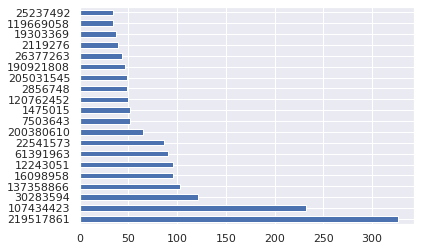

In [ ]:
data.host_id.value_counts().iloc[:20].plot(kind = 'barh')

->We can observe that the highest times transaction done by a customer is 327.  
->This 20 host are most busiest host.

# <b> Host name</b>

In [ ]:
private = data[data['room_type']=='Private room']
list_private = private.groupby(['host_name','neighbourhood']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)

,host_name,neighbourhood,private
6603,John,Hell's Kitchen,47
7391,Kazuya,Woodside,35
4356,Eyal,Upper West Side,32
4689,Gabriel,Hell's Kitchen,31
10345,Nina,Bedford-Stuyvesant,28
14042,Zach,Fort Greene,26
14015,Yuval,Ridgewood,23
9540,Michael,Williamsburg,22
11915,Sarah,Williamsburg,22
4200,Erin,Chelsea,20


In [ ]:
private = data[data['room_type']=='Shared room']
list_private = private.groupby(['host_name','neighbourhood']).size().reset_index(name='shared').sort_values(by=['shared'],ascending=False)
list_private.head(10)

,host_name,neighbourhood,shared
451,Max,Lower East Side,23
622,Sergii,Bushwick,20
461,Melissa,Bedford-Stuyvesant,18
47,Anchor,Bedford-Stuyvesant,17
225,Gúney,Hell's Kitchen,11
79,Baboucarr,Sunnyside,10
6,Abraham,East Harlem,9
198,Erik,Hell's Kitchen,9
288,Jess & Ana,Corona,8
531,Orit,Port Morris,8


In [ ]:
private = data[data['room_type']=='Entire home/apt']
list_private = private.groupby(['host_name','neighbourhood']).size().reset_index(name='Entire home/apt').sort_values(by=['Entire home/apt'],ascending=False)
list_private.head(10)

,host_name,neighbourhood,Entire home/apt
15502,Sonder (NYC),Financial District,210
16961,Vida,Greenpoint,52
15497,Sonder,Financial District,51
15505,Sonder (NYC),Murray Hill,50
13841,Red Awning,Midtown,49
15625,Stanley,Murray Hill,49
8734,Kara,Hell's Kitchen,41
2188,Blueground,Chelsea,37
17273,Yaacov,Upper East Side,33
8737,Kara,Midtown,33


# <b>EDA on the bases of Types of room</b>

### From this graph we can see that home and apartments are more avilable as as comaperd to private room but shared room are very less avilable as compared to private room and apartments.

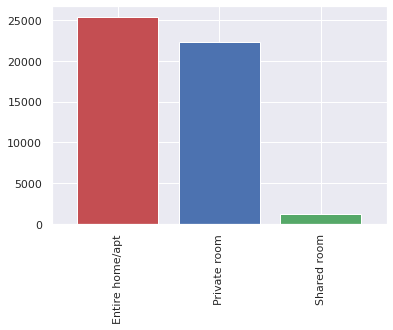

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
# Using bar plot to check the count of the room type 
data['room_type'].value_counts().plot(kind='bar',color=['r','b','g'], width=0.8, )
plt.show()
# Cheking values in the room type columns
data['room_type'].value_counts()

->Here we can see that Entire home/apt has more booking 

### In the bar graph below we can see the shared room are more avilable more as compared to other rooms(private and apartments)

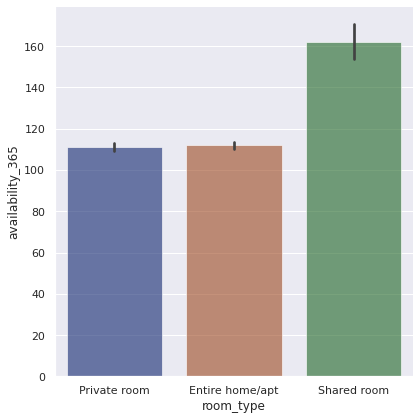

In [ ]:
graph = sns.catplot(data=data, kind="bar", x="room_type", y="availability_365", palette="dark", alpha=.6, height=6)

#### The price of the apartments/home are the highest and the shared rooms is least

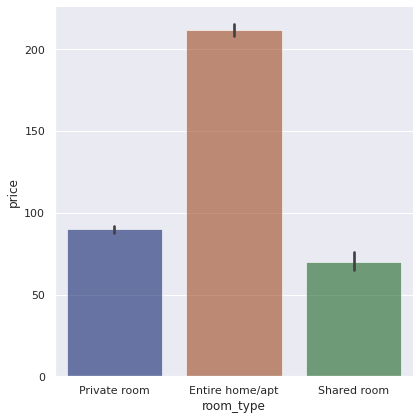

In [ ]:
g = sns.catplot(data=data, kind="bar", x="room_type", y="price", palette="dark", alpha=.6, height=6)

### The minimum nights in apartments are the highest and the private rooms is least

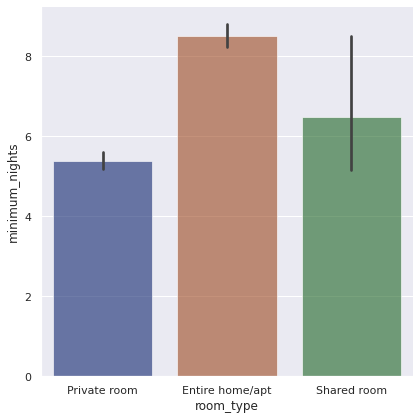

In [ ]:
dg = sns.catplot(
    data=data, kind="bar",
    x="room_type", y="minimum_nights", palette="dark", alpha=.6, height=6
)

### The number of reviews given by private rooms are more as comapred to apartmentes because people stayed less in private rooms and reviews number for shared rooms is least.

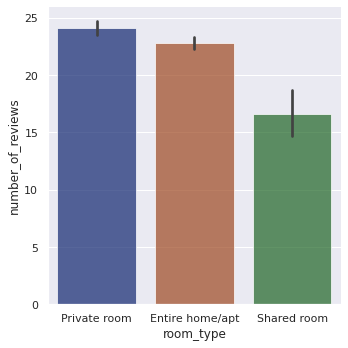

In [ ]:
g = sns.catplot(
    data=data, kind="bar",
    x="room_type", y="number_of_reviews", palette="dark", alpha=.7, height= 5
)

## This graph shows the differnet neighbourhood group having room type according to the price

# Neighbourhood Groups - Location

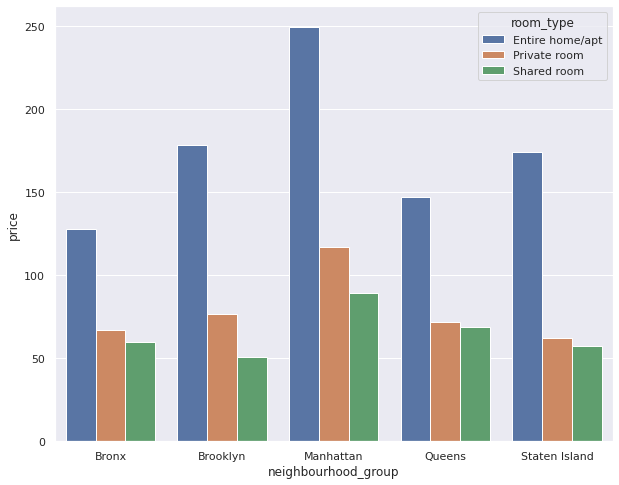

In [ ]:
plt.figure(figsize= (10,8))
mean_price_df = data.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='neighbourhood_group', y ='price', hue='room_type')

# <b>EDA on the bases of the host name</b>

## In private room the John name host have the most room i.e 47

In [ ]:
private = data[data['room_type']=='Private room']
list_private = private.groupby(['host_name','neighbourhood']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)

,host_name,neighbourhood,private
6603,John,Hell's Kitchen,47
7391,Kazuya,Woodside,35
4356,Eyal,Upper West Side,32
4689,Gabriel,Hell's Kitchen,31
10345,Nina,Bedford-Stuyvesant,28
14042,Zach,Fort Greene,26
14015,Yuval,Ridgewood,23
9540,Michael,Williamsburg,22
11915,Sarah,Williamsburg,22
4200,Erin,Chelsea,20


## In the shared room the host name Max have the most shared room's i.e 23

In [ ]:
private = data[data['room_type']=='Shared room']
list_shared = private.groupby(['host_name','neighbourhood']).size().reset_index(name='shared').sort_values(by=['shared'],ascending=False)
list_shared.head(10)

,host_name,neighbourhood,shared
451,Max,Lower East Side,23
622,Sergii,Bushwick,20
461,Melissa,Bedford-Stuyvesant,18
47,Anchor,Bedford-Stuyvesant,17
225,Gúney,Hell's Kitchen,11
79,Baboucarr,Sunnyside,10
6,Abraham,East Harlem,9
198,Erik,Hell's Kitchen,9
288,Jess & Ana,Corona,8
531,Orit,Port Morris,8


## In the Entire home/apt the host name Sonder have the Entire home/apt room i.e 23

In [ ]:
private = data[data['room_type']=='Entire home/apt']
list_home = private.groupby(['host_name','neighbourhood']).size().reset_index(name='Entire home/apt').sort_values(by=['Entire home/apt'],ascending=False)
list_private.head(10)

,host_name,neighbourhood,private
6603,John,Hell's Kitchen,47
7391,Kazuya,Woodside,35
4356,Eyal,Upper West Side,32
4689,Gabriel,Hell's Kitchen,31
10345,Nina,Bedford-Stuyvesant,28
14042,Zach,Fort Greene,26
14015,Yuval,Ridgewood,23
9540,Michael,Williamsburg,22
11915,Sarah,Williamsburg,22
4200,Erin,Chelsea,20


# <b>EDA on the bases of the neighbourhood group</b>

## Neighbourhood group manhanttan have the most room and Staten Island have the least room's

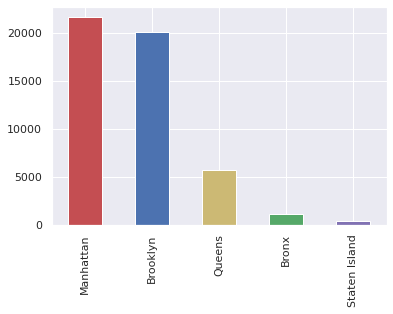

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
# There are 5 particular neighbourhood_group, which means 5 unique locations.
data['neighbourhood_group'].value_counts().plot(kind='bar',color=['r','b','y','g','m'])
plt.show()
data['neighbourhood_group'].value_counts()

### Manhattan is the city where most popular location with 44% of entire dataset. The least happend in Staten Island only 1%. Brooklyn consisted on 41% of transactions with 12% Queens and 2 % in Bronx.

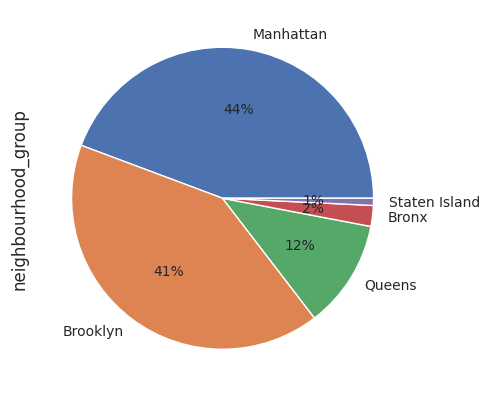

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=100)
data['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=10)

### The group with high number of neighbourhood group are having more costly room's and where as the Staten Island is having least room but having average price for the room's

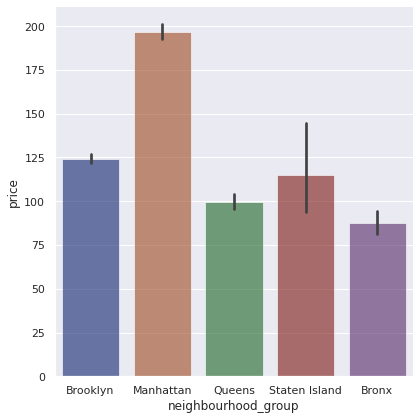

In [ ]:
g = sns.catplot(
    data=data, kind="bar",
    x="neighbourhood_group", y="price", palette="dark", alpha=.6, height=6
)

## The Staten Island is having the most avilable rooms throughout the year and brooklyn is having the least avilable

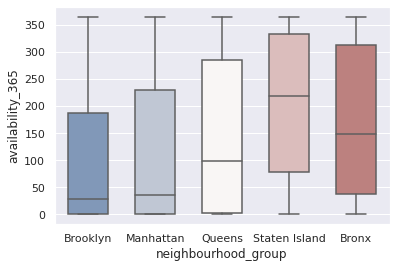

In [ ]:
sns.boxplot(x="neighbourhood_group", y="availability_365", data=data,
            whis=[0, 100], width=.6, palette="vlag")

### From violin plot we can observe that the price distribution and density of neighbourhood group firstly we can see that Manhattam is maximum price distribution and also Bronx is minimum price distribution and Queens and staten Island appear similar distribution.

Text(0.5, 1.0, 'density and distribution of prices for each neighbourhood group')

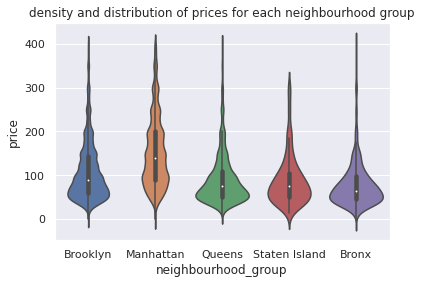

In [ ]:
# creating a sub dataframe
sub_6 = data[data.price < 400]
# use violinplot for density and distribution of prices
viz_2 = sns.violinplot(data = sub_6,x='neighbourhood_group',y='price')
viz_2.set_title('density and distribution of prices for each neighbourhood group')

# <b>EDA on the bases of reviews per month</b>

## The reviews for the Queens and Staten Island are the most and Manhattan is the least

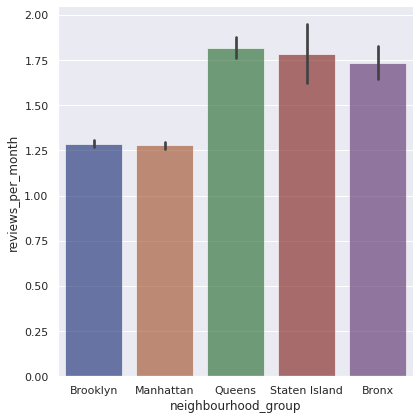

In [ ]:
g = sns.catplot(
    data=data, kind="bar",
    x="neighbourhood_group", y="reviews_per_month", palette="dark", alpha=.6, height=6
)

## All the room's type's get almost same reviews just having minor differnence

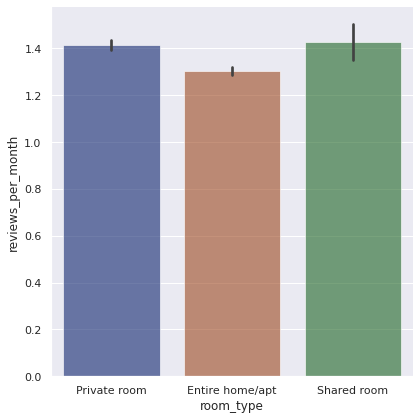

In [ ]:
g = sns.catplot(
    data=data, kind="bar",
    x="room_type", y="reviews_per_month", palette="dark", alpha=.6, height=6
)

#### Firstly we can see that this plot their are 3 sub plot this is use of catplot and comparing all three subplot. x and y axes of all three plot are same but two new elements like column and hue are another 2 sub plot and all observation we can saw that their are three room like private, shared, and entire room distribution for top 6 neighbourhood for 2 brough like Manhattan and Brooklyn and we saw Manhattan and Brooklyn are most listing travelled destination and also observe that bedford-stuyvesant and williamsburg ae most popular neighbourhood for Manhattan,and Harlem for Brooklyn

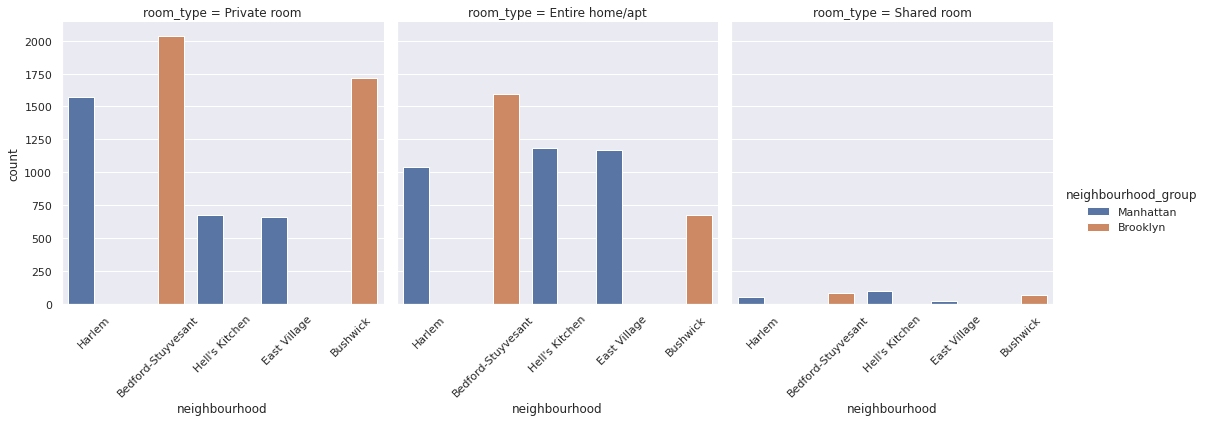

In [ ]:
#combine our brough and room type for better visualization
#grabbing top 8 neighbourhood from sub dataframe
sub_7 = data.loc[data['neighbourhood'].isin(['Williamburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West side','Hell\'s Kitchen','East Village'])]
# use catploat to represent multiple attribute and count it
viz_3 = sns.catplot(x='neighbourhood',hue = 'neighbourhood_group',col = 'room_type',data = sub_7,kind = 'count')
viz_3.set_xticklabels(rotation = 45)

### Staten Island is having the least shared room and Manhatten is having the most expensive rooms i.r home/apt.

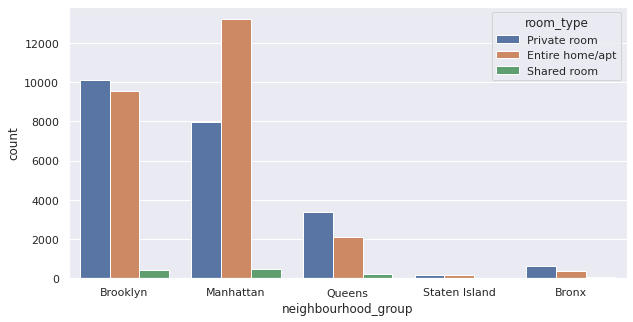

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='neighbourhood_group', hue='room_type', data=data)
plt.show()

# <b>EDA on the bases of price</b>

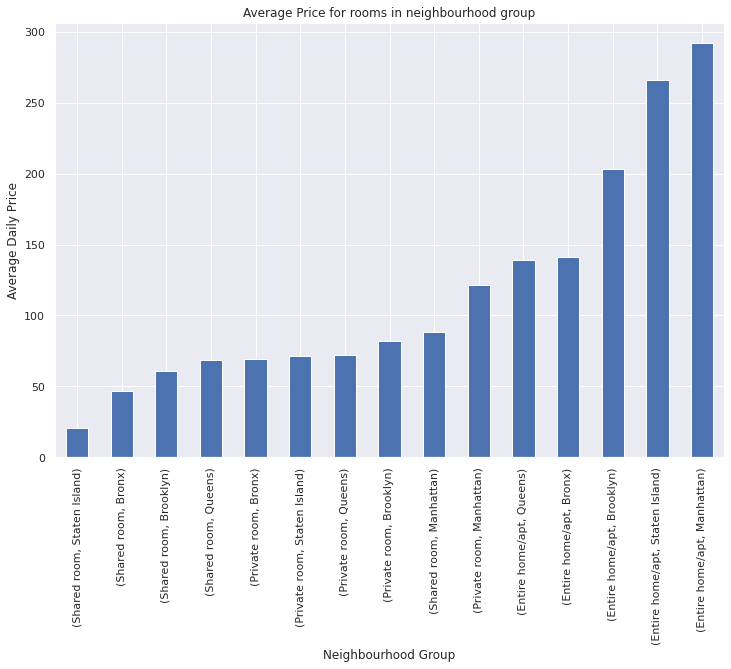

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [ ]:
data.head()
plt.figure(figsize=(12,8))
df = data[data['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')

## Most of the price of rooms is below 2000

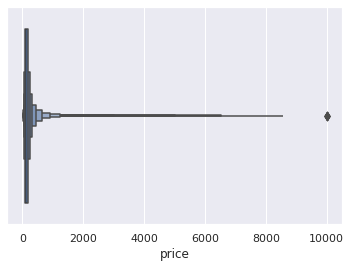

In [ ]:
figsize=(12,8)
sns.boxenplot(x='price',data=data)

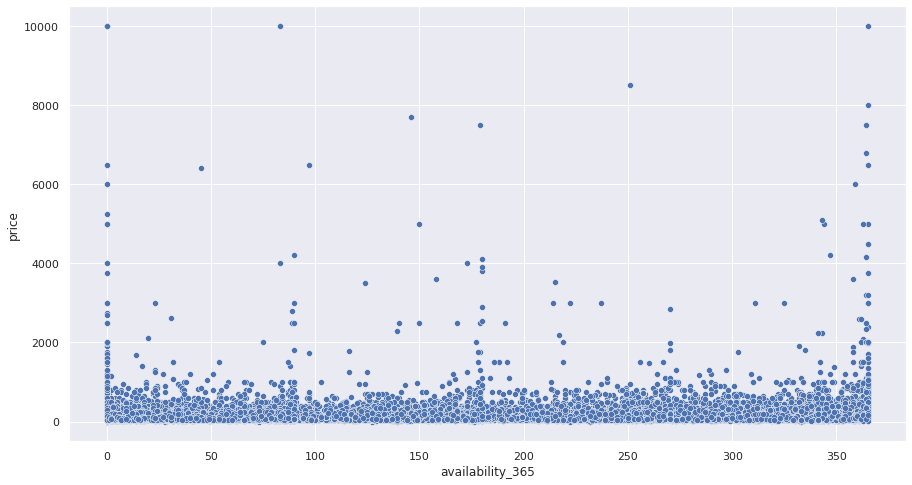

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=data['price'],x=data['availability_365'])

                                price
neighbourhood                        
Bath Beach                  81.764706
Bay Ridge                  144.432624
Bedford-Stuyvesant         107.678244
Bensonhurst                 75.786667
Bergen Beach               106.700000
Boerum Hill                176.135593
Borough Park                63.066176
Brighton Beach             131.933333
Brooklyn Heights           209.064935
Brownsville                 76.459016
Bushwick                    84.800406
Canarsie                   104.367347
Carroll Gardens            175.914163
Clinton Hill               181.893357
Cobble Hill                211.929293
Columbia St                162.952381
Coney Island               123.705882
Crown Heights              112.480179
Cypress Hills              128.903704
DUMBO                      196.305556
Downtown Brooklyn          150.349398
Dyker Heights               93.416667
East Flatbush              104.222000
East New York               85.426606
Flatbush    

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


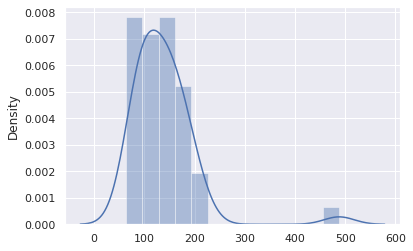

In [ ]:
df1 = data[data.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
print(d)
sns.distplot(d)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


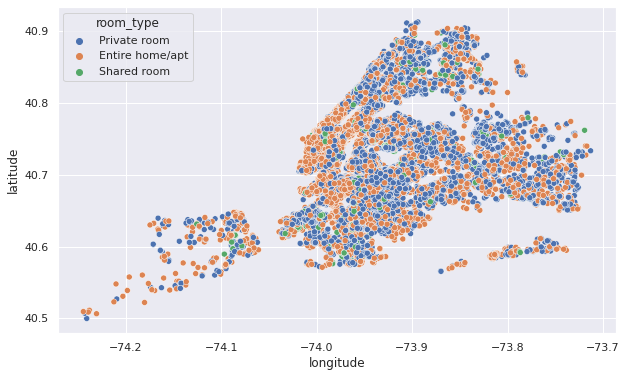

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.room_type)

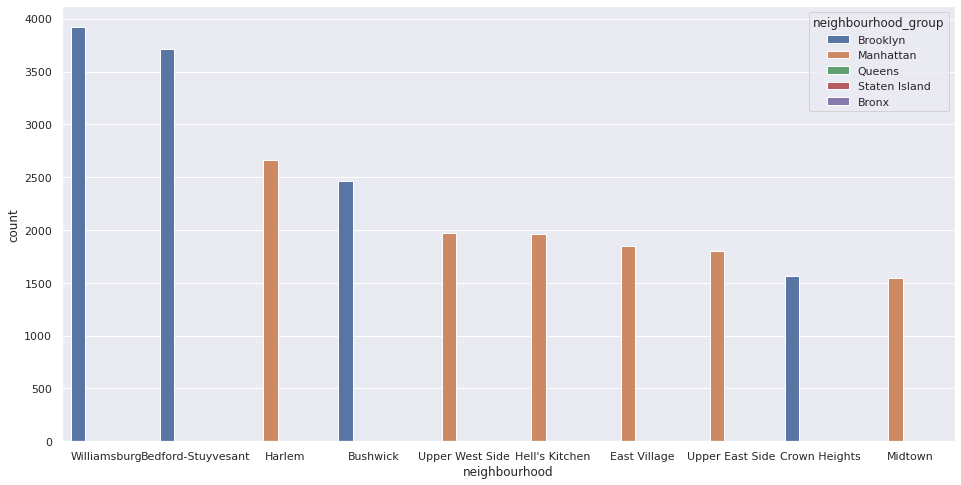

In [ ]:
plt.figure(figsize= (16,8))
sns.countplot(x=data['neighbourhood'],order=data.neighbourhood.value_counts().iloc[:10].index,
                    hue=data['neighbourhood_group'])

In [ ]:
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')
data['Days'], data['Month'], data['Years'] = (data['last_review'].dt.day, data['last_review'].dt.month, data['last_review'].dt.year)
data['last_review'] = pd.to_datetime(data['last_review']).dt.date

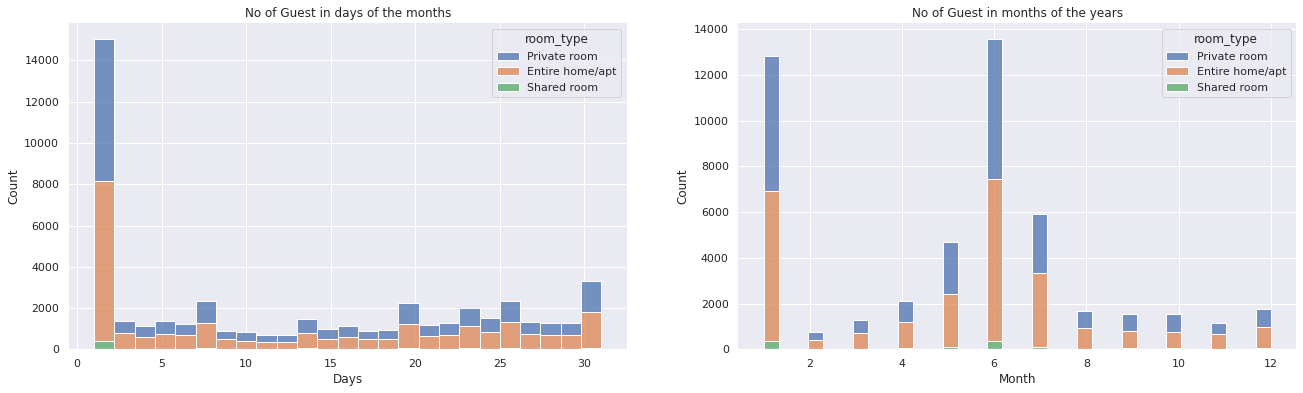

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))
ax = axes.flatten()

sns.histplot(data=data, x='Days', hue='room_type', multiple="stack", ax=ax[0])
ax[0].set_title('No of Guest in days of the months')
sns.histplot(data=data, x='Month', hue='room_type', multiple="stack", ax=ax[1])
ax[1].set_title('No of Guest in months of the years')
sns.despine(fig, left=True)

## <b> What can we learn about different hosts and areas?

Predications = Host name Sonder (NYC) from	Financial District	have the most accomdation(Home and Apartmenets) i.e 210 for all other private(47) and shared rooms(23)
</b>


* <b>The Staten Island is having the most avilable rooms throughout the year and brooklyn is having the least avilable</b>

<b>* What can we learn from predictions? (ex: locations, prices, reviews, etc)</b>
## <b>Locations with respect to price avilabilty</b>
<b>Predications</b> = The room avilable in different locations are:
* 1. <b>Manhattan</b>     = 21661
  2. <b>Brooklyn</b>      = 20104
  3. <b>Queens</b>        = 5666
  4. <b>Bronx</b>         = 1091
  5. <b>Staten Island</b> = 373
*<b> The group with high number of neighbourhood group(Manhattan) are having more costly room's and less room are having less price excpet Staten Island</b>
* <b>The Staten Island is having the most avilable rooms throughout the year and brooklyn is having the least avilable</b>

## <b>Price with respect to avilabilty through out the year</b>
* <b>As we can see that the most of the price is below the range of 2000 and the highest price for the hotel is 10000 for 3 hotels and among which one avilable all the time and one is not avilable all the time for some reason and one is avilable at some time and not avilable some time.</b>

## <b>Reviews with respect to room type and neighbourhood</b>
* <b>All the room's get almost same type of reviews just having minor differnence</b>

* <b>The reviews for the Queens and Staten Island are the most and Manhattan is the least</b>

## Which hosts are the busiest and why?
Count of listing by top 10 hosts is almost 2.5% (1270 listings) of the whole dataset.

Is there any noticeable difference of traffic among different areas and what could be the reason for it?
More customer preferred Manhattan location for night stay than Brooklyn
● 63.2% customer spend night in Entire home and 1.6% spend night in Shared room